In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)


In [59]:
df = pd.read_csv("Retail Sales Dataset.csv")
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [62]:
df.colum


Index(['Transaction_ID', 'Date', 'Customer_ID', 'Gender', 'Age',
       'Product_Category', 'Quantity', 'Price_per_Unit', 'Total_Amount'],
      dtype='object')

In [61]:
# Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Drop missing values and duplicates
df = df.dropna()
df = df.drop_duplicates()

# Check info
df.info()







<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction_ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer_ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product_Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price_per_Unit    1000 non-null   int64 
 8   Total_Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [37]:
print(df.describe())

for col in df.select_dtypes(include='object').columns:
    print(f"Mode of {col}: {df[col].mode()[0]}")



       Transaction_ID         Age     Quantity  Price_per_Unit  Total_Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000
Mode of Customer_ID: CUST001
Mode of Gender: Female
Mode of Product_Category: Clothing


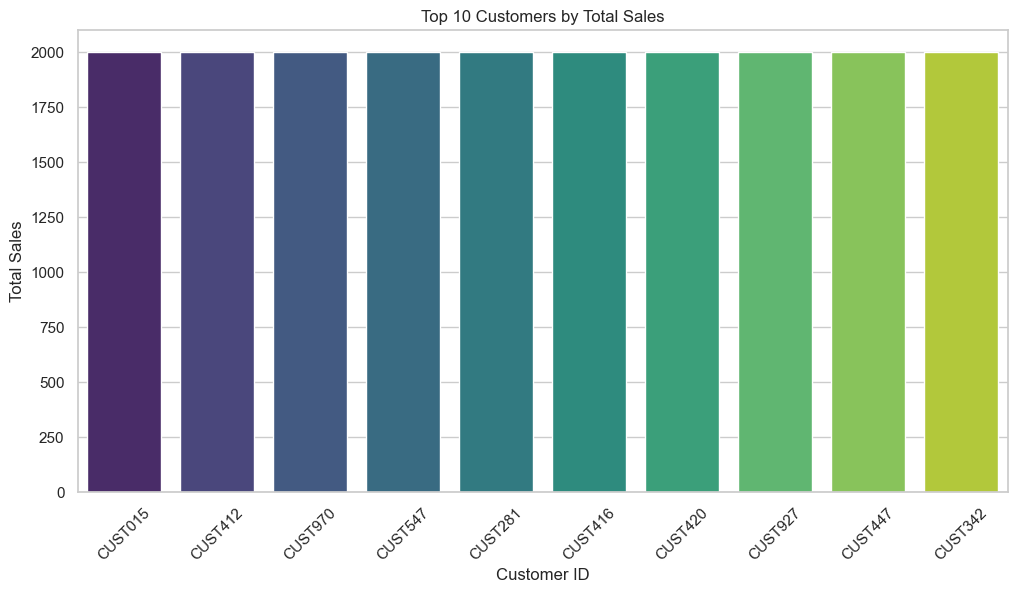

In [45]:
# Add a temporary column for hue
top_customers_df['Customer_Hue'] = top_customers_df['Customer_ID']

# Plot with hue
sns.barplot(
    data=top_customers_df,
    x='Customer_ID',
    y='Total_Amount',
    hue='Customer_Hue',
    dodge=False,
    palette='viridis'
)

# Remove redundant legend
plt.legend([], [], frameon=False)
plt.title("Top 10 Customers by Total Sales")
plt.ylabel("Total Sales")
plt.xlabel("Customer ID")
plt.xticks(rotation=45)
plt.show()


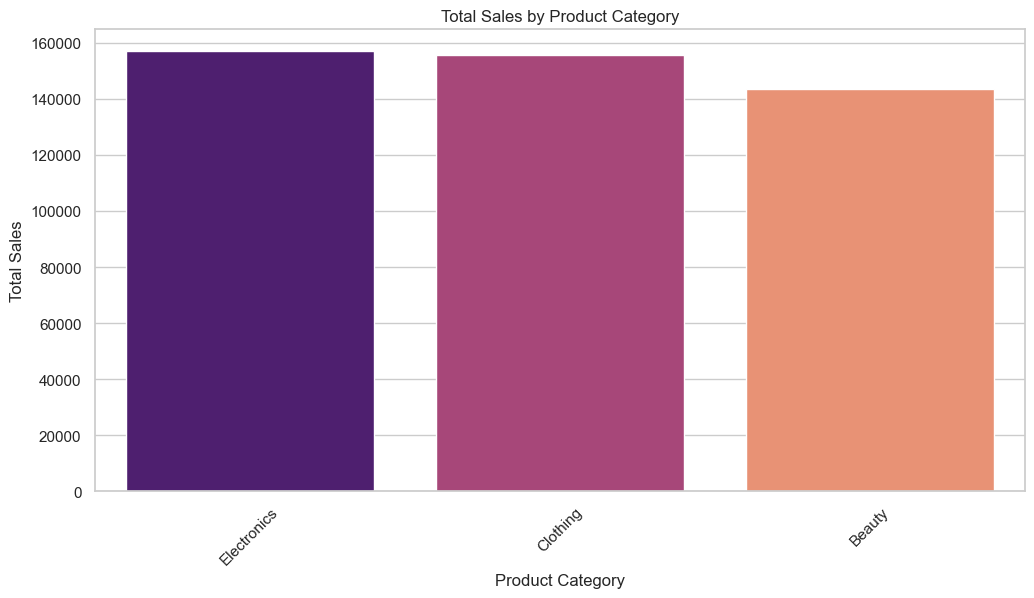

In [48]:
# Sales by product category
category_sales = df.groupby('Product_Category')['Total_Amount'].sum().sort_values(ascending=False)

# Convert to DataFrame for Seaborn
category_sales_df = category_sales.reset_index()
category_sales_df.columns = ['Product_Category', 'Total_Amount']

# Add a temporary column for hue
category_sales_df['Category_Hue'] = category_sales_df['Product_Category']

# Plot with hue
sns.barplot(
    data=category_sales_df,
    x='Product_Category',
    y='Total_Amount',
    hue='Category_Hue',
    dodge=False,
    palette='magma'
)

# Remove redundant legend
plt.legend([], [], frameon=False)
plt.title("Total Sales by Product Category")
plt.ylabel("Total Sales")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.show()



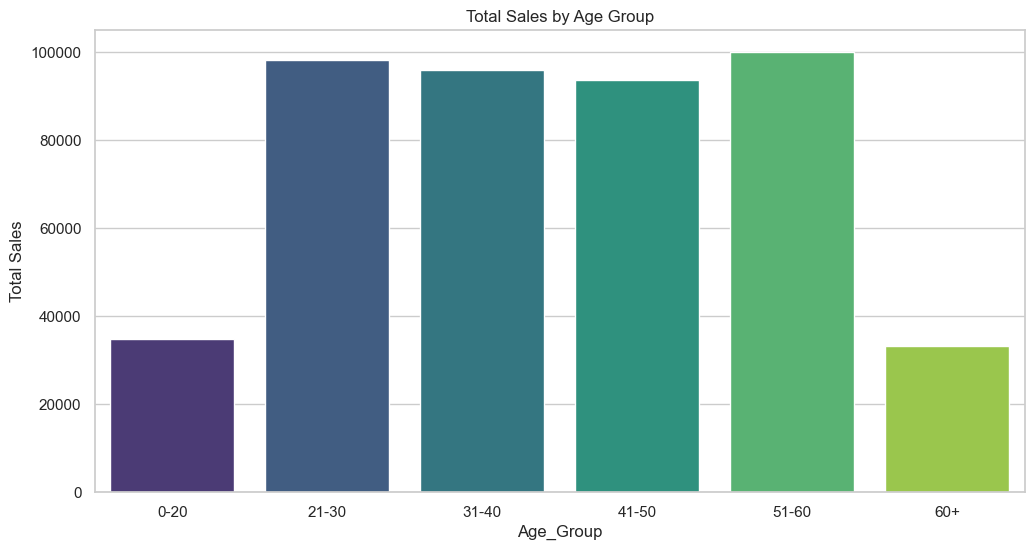

In [53]:
# Sales by Age Group
df['Age_Group'] = pd.cut(df['Age'], bins=[0,20,30,40,50,60,100], labels=['0-20','21-30','31-40','41-50','51-60','60+'])
age_sales = df.groupby('Age_Group', observed=False)['Total_Amount'].sum().reset_index()

# Add temporary hue column
age_sales['Age_Hue'] = age_sales['Age_Group']

# Plot with hue
sns.barplot(
    data=age_sales,
    x='Age_Group',
    y='Total_Amount',
    hue='Age_Hue',
    dodge=False,
    palette='viridis'
)

# Remove redundant legend
plt.legend([], [], frameon=False)
plt.title("Total Sales by Age Group")
plt.ylabel("Total Sales")
plt.show()




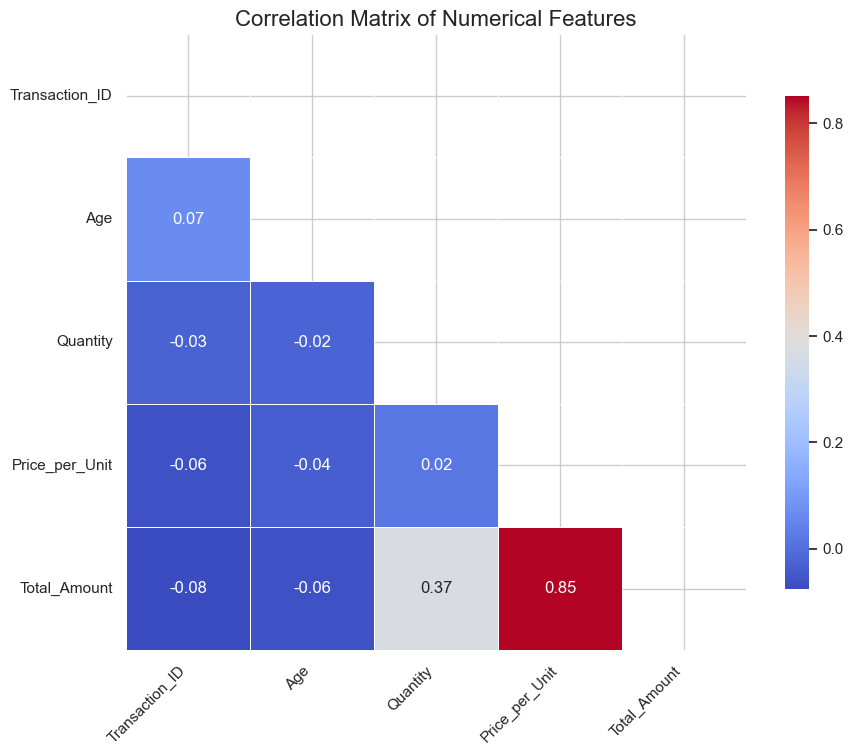

In [51]:

# Correlation matrix of numerical columns
numeric_features = df.select_dtypes(include=[np.number])
corr_matrix = numeric_features.corr()

# Create a mask for the upper triangle (optional, cleaner view)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10,8))

# Draw the heatmap with enhanced aesthetics
sns.heatmap(
    corr_matrix,
    mask=mask,                 # hide upper triangle
    annot=True,                # show correlation values
    fmt=".2f",                 # format to 2 decimal places
    cmap='coolwarm',           # color map
    linewidths=0.5,            # grid lines between cells
    cbar_kws={"shrink": 0.8}  # colorbar size
)

plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [57]:
print("""
Recommendations:

1,Focuf on your bestsellers.Keep an eye on your top-selling products and loyal customers—they’re driving most of your revenue, so consider ways to keep them engaged.

2,Boost slow months.Check which months have lower sales and plan marketing campaigns, discounts, or special promotions to fill those gaps.

3,Bundle popular products.Pair your most popular items together in promotional offers—it can increase overall sales and make your products more attractive.

3,Target the right customers.Look at customer demographics like age and gender to create promotions that feel personalized and relevantt.
""")



Recommendations:

1,Focuf on your bestsellers.Keep an eye on your top-selling products and loyal customers—they’re driving most of your revenue, so consider ways to keep them engaged.

2,Boost slow months.Check which months have lower sales and plan marketing campaigns, discounts, or special promotions to fill those gaps.

3,Bundle popular products.Pair your most popular items together in promotional offers—it can increase overall sales and make your products more attractive.

3,Target the right customers.Look at customer demographics like age and gender to create promotions that feel personalized and relevantt.

